In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score,  KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, log_loss, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

Loading the dataset.

In [2]:
dataset = pd.read_csv('./Dataset/dataset_B_05_2020.csv')
dataset.head 

<bound method NDFrame.head of                                                      url  length_url  \
0                  http://www.crestonwood.com/router.php          37   
1      http://shadetreetechnology.com/V4/validation/a...          77   
2      https://support-appleld.com.secureupdate.duila...         126   
3                                     http://rgipt.ac.in          18   
4      http://www.iracing.com/tracks/gateway-motorspo...          55   
...                                                  ...         ...   
11425      http://www.fontspace.com/category/blackletter          45   
11426  http://www.budgetbots.com/server.php/Server%20...          84   
11427  https://www.facebook.com/Interactive-Televisio...         105   
11428             http://www.mypublicdomainpictures.com/          38   
11429  http://174.139.46.123/ap/signin?openid.pape.ma...         477   

       length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
0                   19   

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

Constructing x and y from the dataset.

Splitting the dataset into Training data and Validation data(Test Data).

In [4]:
#Retaining 5 data for final Validation
val = dataset['url'][:5]
y_val = [1 if i == 'legitimate' else 0 for i in dataset['status']][:5]
x_val = dataset.drop('url', axis=1).drop('status', axis = 1)[:5]

#Splitting data
x = dataset.drop('url', axis = 1).drop('status', axis = 1)[5:]
y = [1 if i == 'legitimate' else 0 for i in dataset['status']][5:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

Defining a common training funtion for diffferent models.

Returns the Time taken, Accuracy, Macro f1 score and the trained model.

In [5]:
def training(model, name, x_train, y_train, x_test, y_test):
    tic = time.time()
    model.fit(x_train, y_train)
    toc = time.time()
    train_time = toc - tic
    y_pred = model.predict(x_test)
    accuracy = np.round(accuracy_score(y_test, y_pred), 3)
    macro_f1 = np.round(f1_score(y_test, y_pred), 3)
    recall = np.round(recall_score(y_test, y_pred), 3)
    logl = np.round(log_loss(y_test, y_pred), 3)
    print(f'Train Size = {len(y_train)}, Test Size = {len(y_test)}')
    print(f'Time taken = {train_time}')
    print(f'Accuracy = {accuracy}')
    print(f'Macro F1 Score = {macro_f1}')
    print(f'Recall = {recall}')
    print(f'Log Loss = {logl}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)
    plt.savefig(f'./figs/models/conf_{name}')
    print("ROC curve:")
    RocCurveDisplay.from_estimator(model,x_test,y_test)
    plt.savefig(f'./figs/models/roc_{name}')
    plt.show()
    return [model, train_time, accuracy, macro_f1, recall, logl]

model_comp = {}

Model 1: Support Vector Classification.

Model: Support Vector Model
Train Size = 9140, Test Size = 2285
Time taken = 8.736103773117065
Accuracy = 0.965
Macro F1 Score = 0.965
Recall = 0.967
Log Loss = 1.278
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1146
           1       0.96      0.97      0.96      1139

    accuracy                           0.96      2285
   macro avg       0.96      0.96      0.96      2285
weighted avg       0.96      0.96      0.96      2285

Confusion Matrix:
ROC curve:


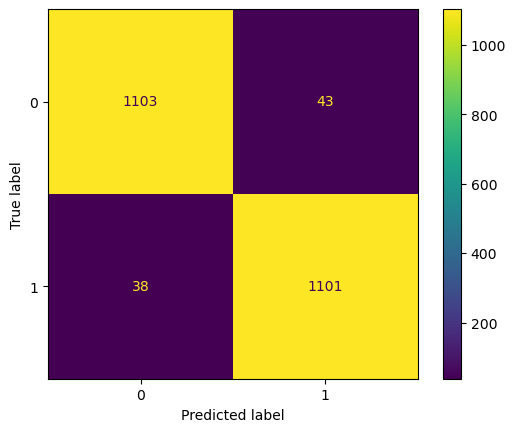

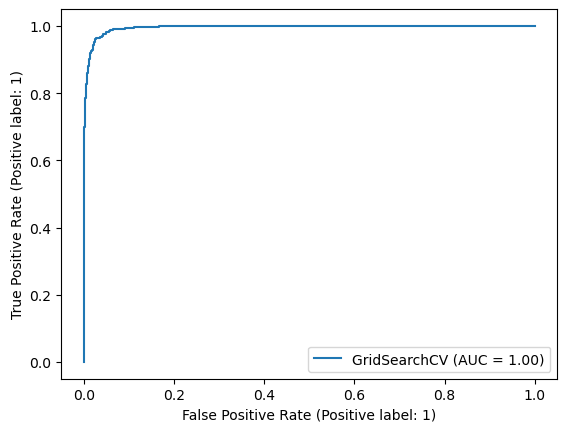

In [6]:
def svm(x_train, y_train, x_test, y_test): 
    svm_model = SVC()
    param_grid = {
    'C':[0.01,1,10,100],
    }
    model = GridSearchCV(svm_model,param_grid, scoring = 'accuracy', cv = 2)
    print('Model: Support Vector Model')
    return training(model,'svm', x_train, y_train, x_test, y_test)
model_comp['svm'] = svm(X_train, y_train, X_test, y_test)

Model 2: Logistic Reggression Classifier.

Model: Logistic Regression
Train Size = 9140, Test Size = 2285
Time taken = 11.46157693862915
Accuracy = 0.954
Macro F1 Score = 0.954
Recall = 0.956
Log Loss = 1.672
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1146
           1       0.95      0.96      0.95      1139

    accuracy                           0.95      2285
   macro avg       0.95      0.95      0.95      2285
weighted avg       0.95      0.95      0.95      2285

Confusion Matrix:
ROC curve:


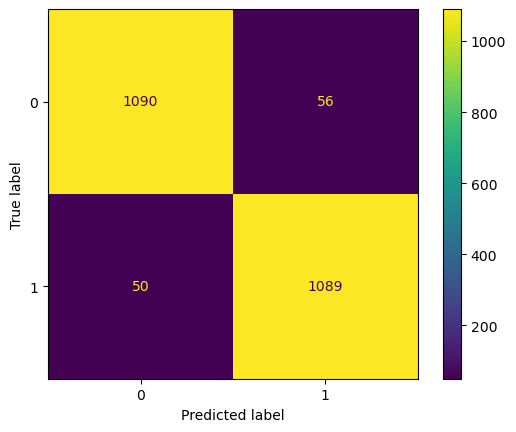

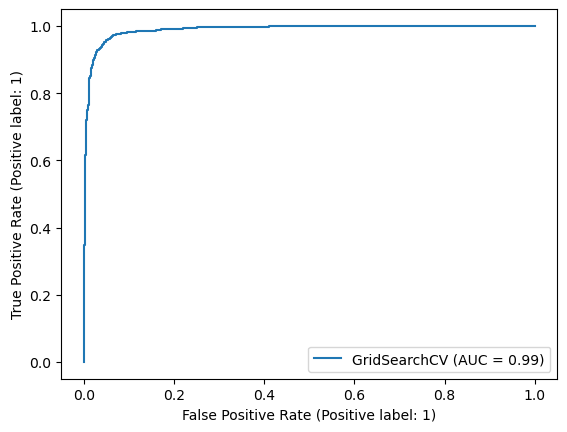

In [7]:
def logistic_regression(x_train, y_train, x_test, y_test):
    logistic_model = LogisticRegression(max_iter = 600)
    param_grid = {
    'C':np.logspace(0,10,5),
    }     
    model = GridSearchCV(logistic_model,param_grid, scoring = 'accuracy', cv = 10)
    print('Model: Logistic Regression')
    return training(model, 'logistic_regression', x_train, y_train, x_test, y_test)
model_comp['logistic_regression'] = logistic_regression(X_train, y_train, X_test, y_test)

Model 3: Decision Tree Classifier.

Model: Decision Tree Model
Train Size = 9140, Test Size = 2285
Time taken = 3.71356463432312
Accuracy = 0.95
Macro F1 Score = 0.95
Recall = 0.944
Log Loss = 1.798
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1146
           1       0.96      0.94      0.95      1139

    accuracy                           0.95      2285
   macro avg       0.95      0.95      0.95      2285
weighted avg       0.95      0.95      0.95      2285

Confusion Matrix:
ROC curve:


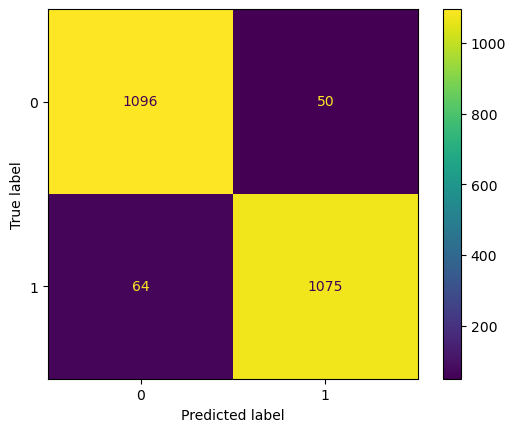

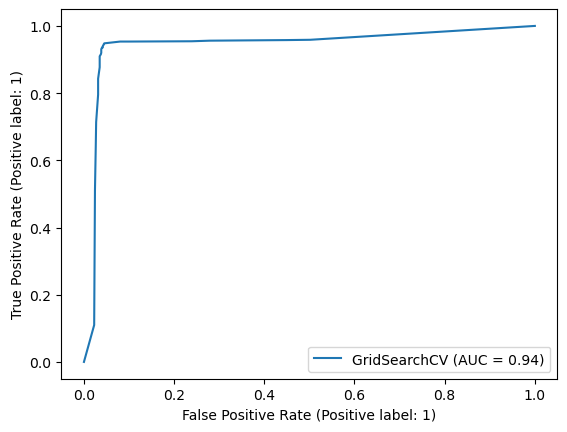

In [8]:
def decision_tree(x_train, y_train, x_test, y_test):
    decision_tree_model = DecisionTreeClassifier()
    param_grid = {
    'max_depth':[1, 2, 4, 6, 8, 10, 12]
    }     
    model = GridSearchCV(decision_tree_model, param_grid, scoring = 'accuracy', cv = 10)
    print('Model: Decision Tree Model')
    return training(model, 'decision_tree', x_train, y_train, x_test, y_test)
model_comp['decision_tree'] = decision_tree(X_train, y_train, X_test, y_test)

Model 4: Random Forest Classifier

Model: Random Forest Model
Train Size = 9140, Test Size = 2285
Time taken = 11.85379147529602
Accuracy = 0.975
Macro F1 Score = 0.974
Recall = 0.968
Log Loss = 0.915
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1146
           1       0.98      0.97      0.97      1139

    accuracy                           0.97      2285
   macro avg       0.97      0.97      0.97      2285
weighted avg       0.97      0.97      0.97      2285

Confusion Matrix:
ROC curve:


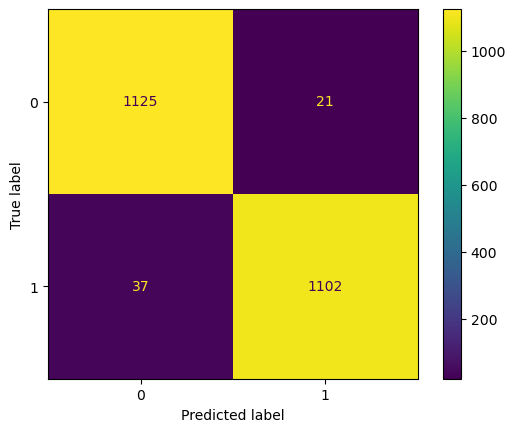

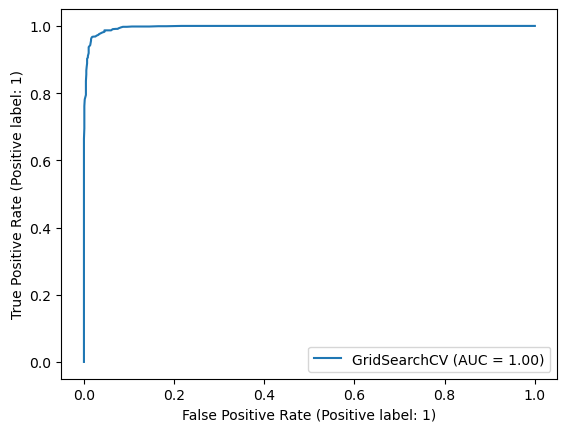

In [23]:
def random_forest(x_train, y_train, x_test, y_test):      
    random_forest_model = RandomForestClassifier()
    param_grid = {
    'n_estimators':list(range(10,100,30))
    }     
    model = GridSearchCV(random_forest_model, param_grid, scoring = 'accuracy', cv = 10)
    print('Model: Random Forest Model')
    return training(model, 'random_forest', x_train, y_train, x_test, y_test)
model_comp['random_forest'] = random_forest(X_train, y_train, X_test, y_test)

Model Comparison

,Time Taken,Accuracy,Macro F1 Score,Recall,Log Loss
svm,8.736104,0.965,0.965,0.967,1.278
logistic_regression,11.461577,0.954,0.954,0.956,1.672
decision_tree,3.713565,0.950,0.950,0.944,1.798
random_forest,11.853791,0.975,0.974,0.968,0.915


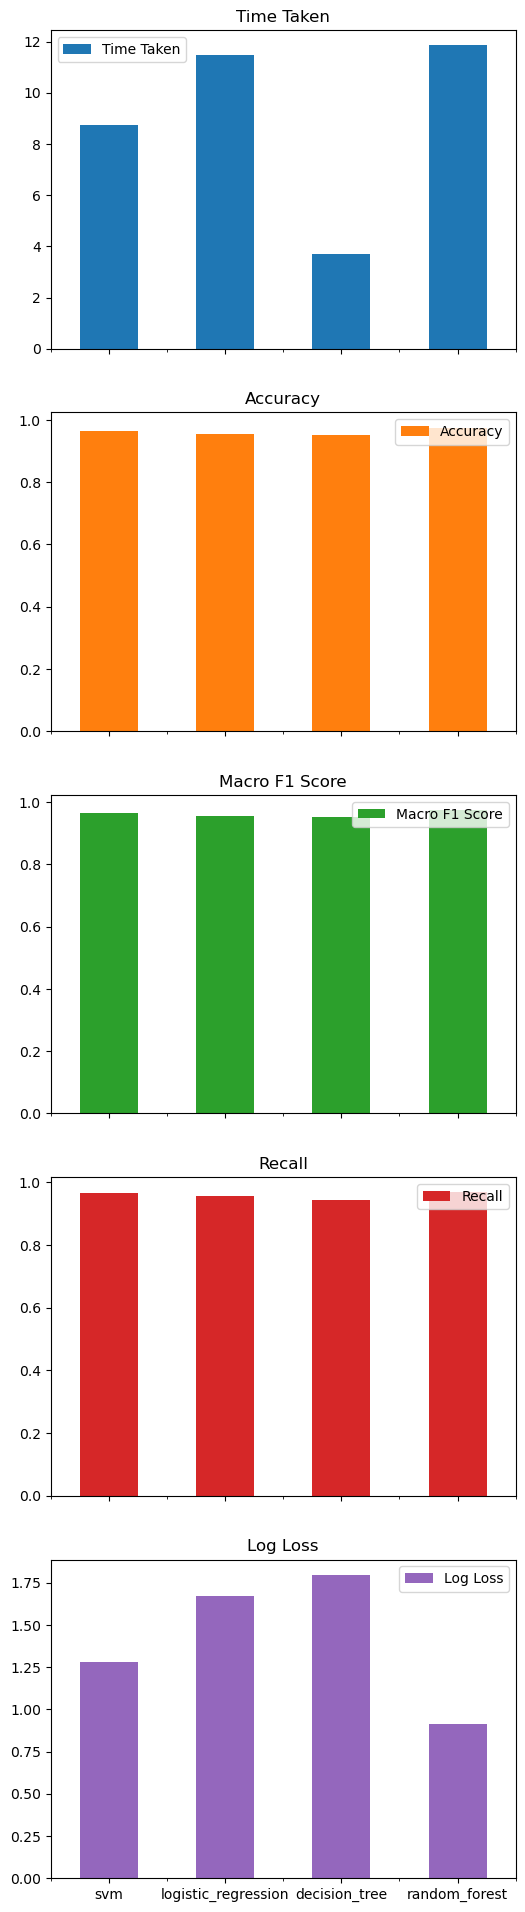

In [24]:
plots = ['Time Taken', 'Accuracy', 'Macro F1 Score', 'Recall', 'Log Loss']
model_values = [i[1:] for i in model_comp.values()]
comp = pd.DataFrame(model_values, index = list(model_comp.keys()), columns = plots)
display(comp)

axs = comp.plot.bar(subplots=True, figsize=(6,24), rot=0)
axs[1].legend()
plt.show()